# Détection des FOG

# I. Chargement des fichiers

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt


# Obtenez le répertoire imus6_subjects7
repertoire_imus6_subjects7 = 'C:/Users/antho/Documents/MEMOIRE_M2/CODE_STAGE_M2/data_article/raw/imus6_subjects7'

# Chargez les données à partir du fichier Excel en utilisant le chemin relatif
pt1_visit_24_tbc_walklr_0_trial_2 = pd.read_excel(os.path.join(repertoire_imus6_subjects7, 'pt1_visit_24_tbc_walklr_0_trial_2.xlsx'))
pt1_visit_24_tbc_walklr_0_trial_4 = pd.read_excel(os.path.join(repertoire_imus6_subjects7, 'pt1_visit_24_tbc_walklr_0_trial_4.xlsx'))

# Supprimez les colonnes contenant des valeurs manquantes pour avoir les colonnes avec les IMUs actifs
pt1_visit_24_tbc_walklr_0_trial_2.dropna(axis=1, inplace=True)
pt1_visit_24_tbc_walklr_0_trial_4.dropna(axis=1, inplace=True)

# II. Filtrage des signaux

In [57]:
'''from scipy.signal import butter, filtfilt
# Fonction pour concevoir le filtre Butterworth
def butterworth_filter(data, cutoff_frequency, sampling_rate, order=8):
    nyquist_frequency = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Fréquence de coupure et taux d'échantillonnage
cutoff_frequency = 20  # Hz
sampling_rate = 1 / (pt1_visit_24_tbc_walklr_0_trial_2['time'].iloc[1] - pt1_visit_24_tbc_walklr_0_trial_2['time'].iloc[0])  # Calcul du taux d'échantillonnage

# Colonnes à exclure du filtre
columns_to_exclude = ['time', 'subject_ID', 'freeze_label']

# Colonnes à filtrer
columns_to_filter = [col for col in pt1_visit_24_tbc_walklr_0_trial_2.columns if col not in columns_to_exclude]

# Appliquer le filtre à toutes les colonnes sauf celles exclues
for column in columns_to_filter:
    filtered_data = butterworth_filter(pt1_visit_24_tbc_walklr_0_trial_2[column], cutoff_frequency, sampling_rate)
    pt1_visit_24_tbc_walklr_0_trial_2[f'filtered_{column}'] = filtered_data'''

# III. Visualisation graphique 

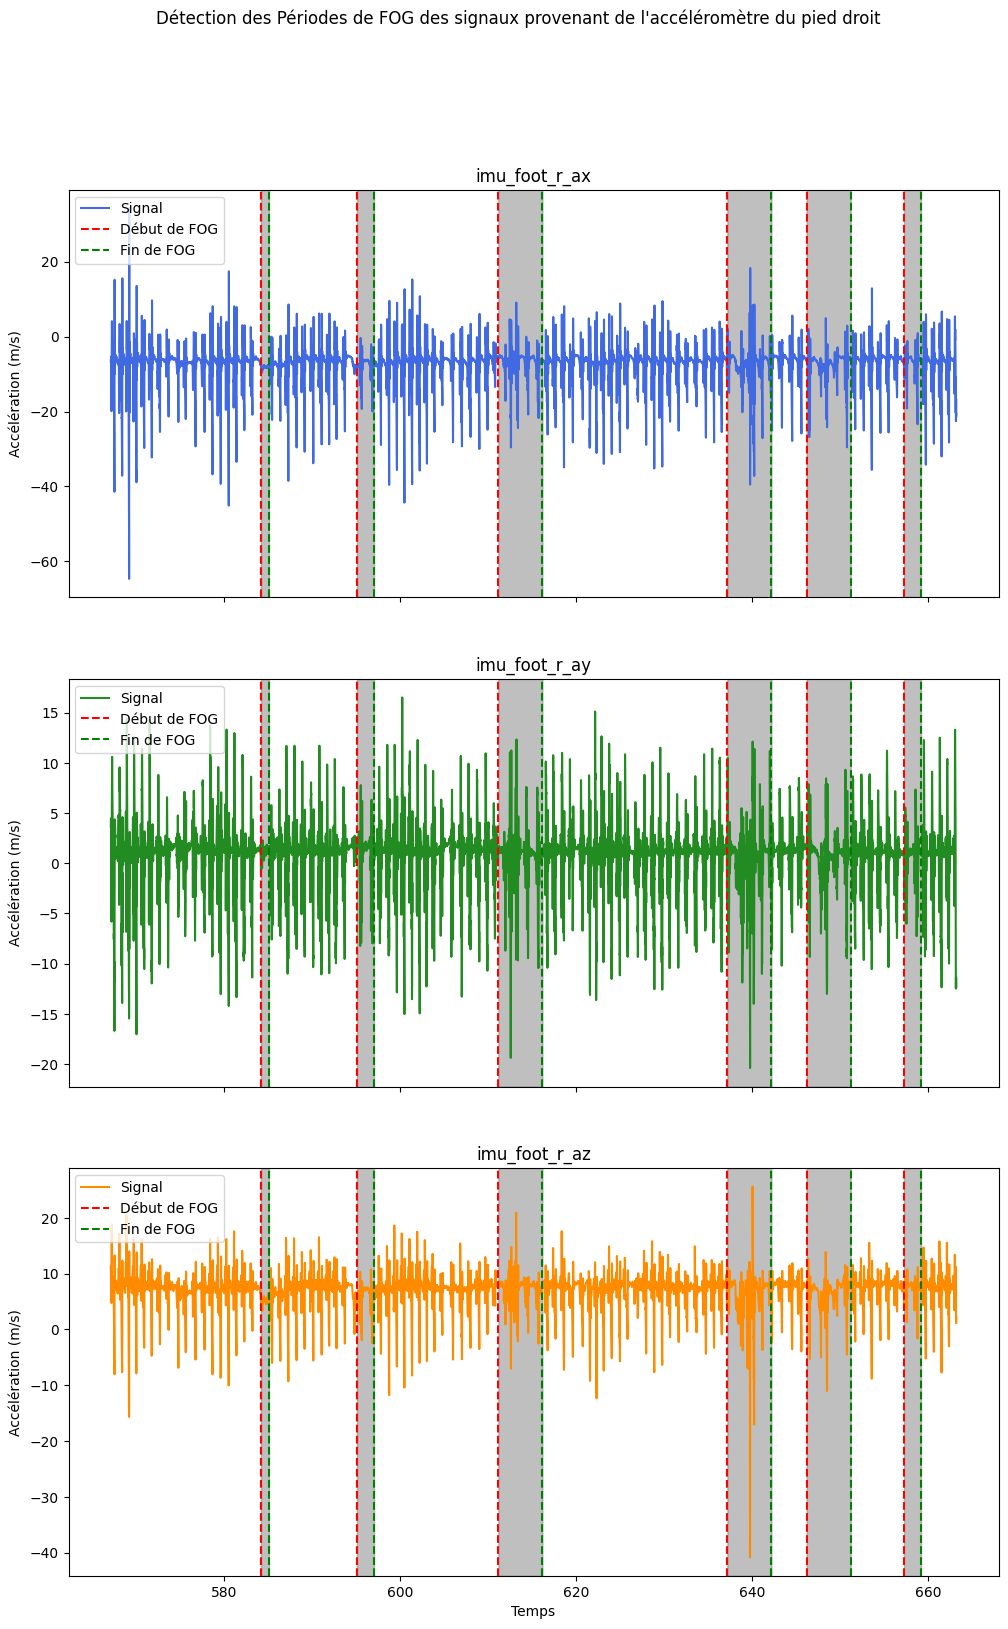

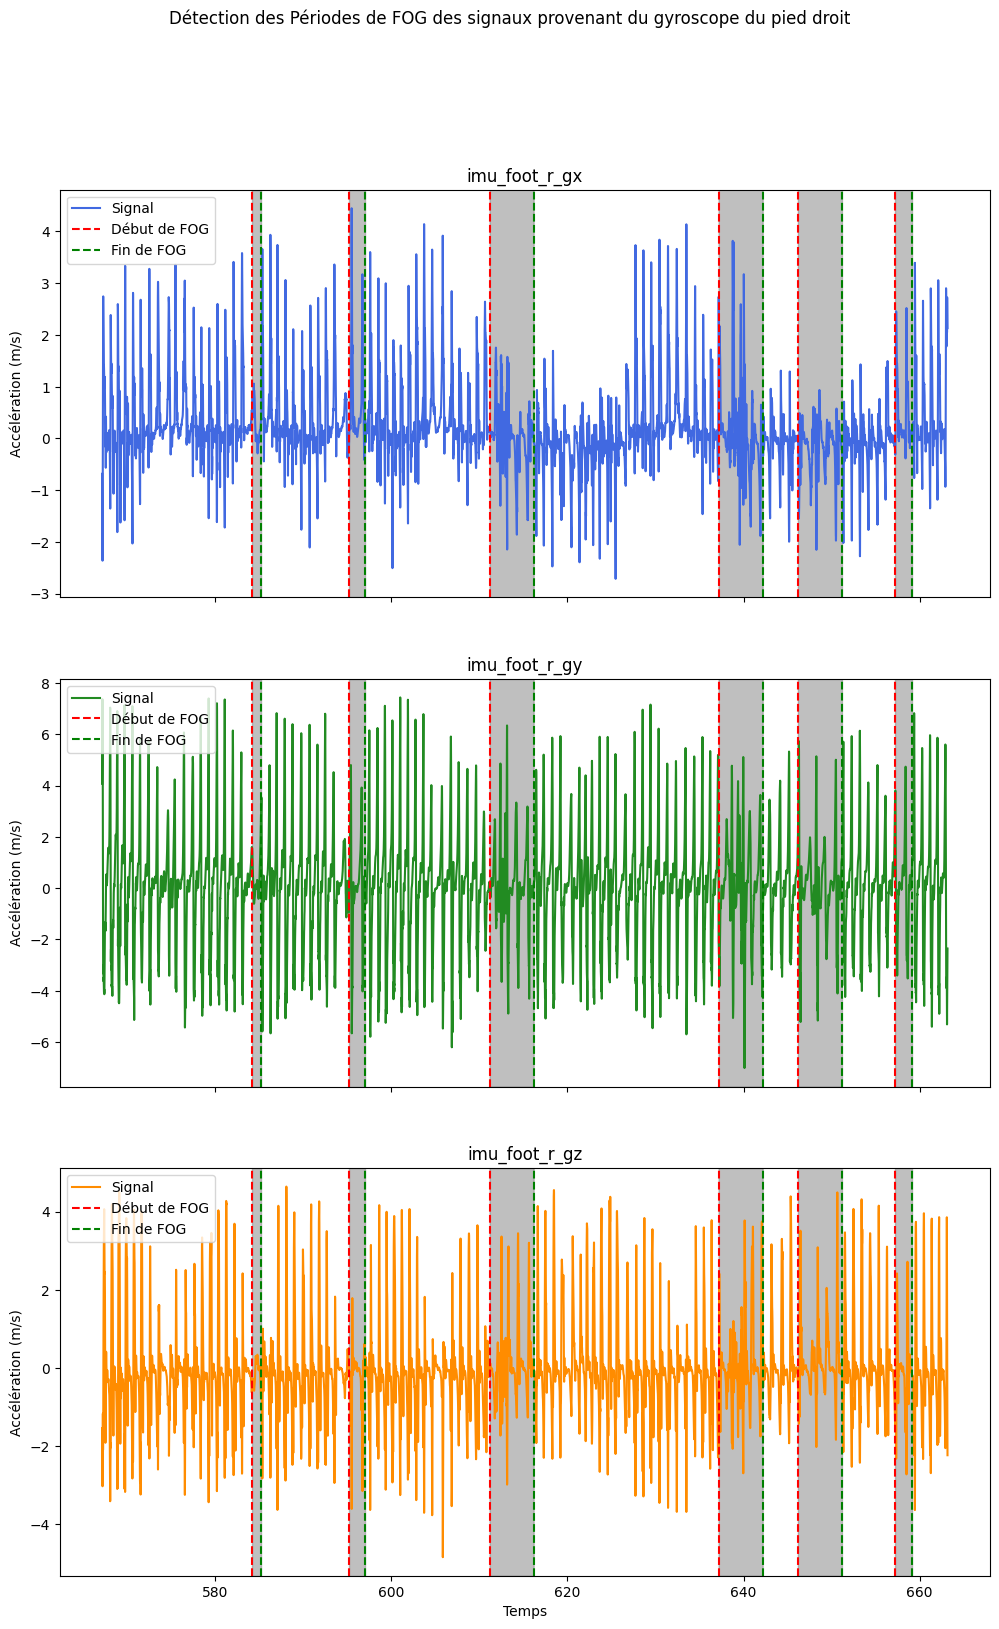

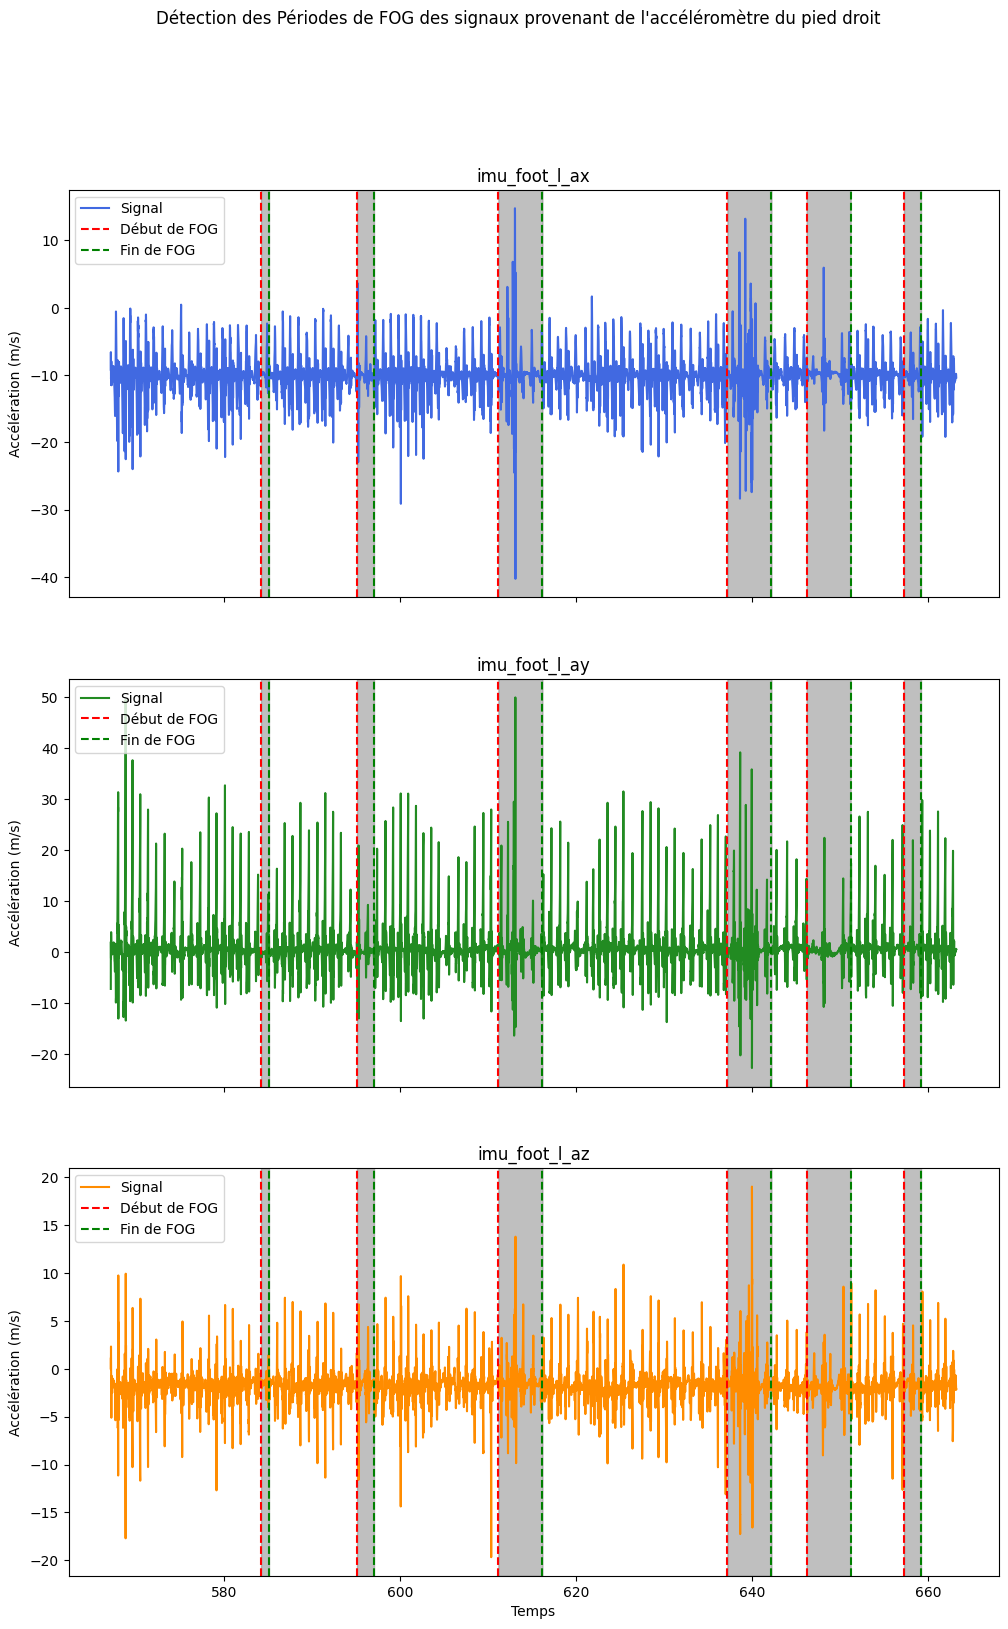

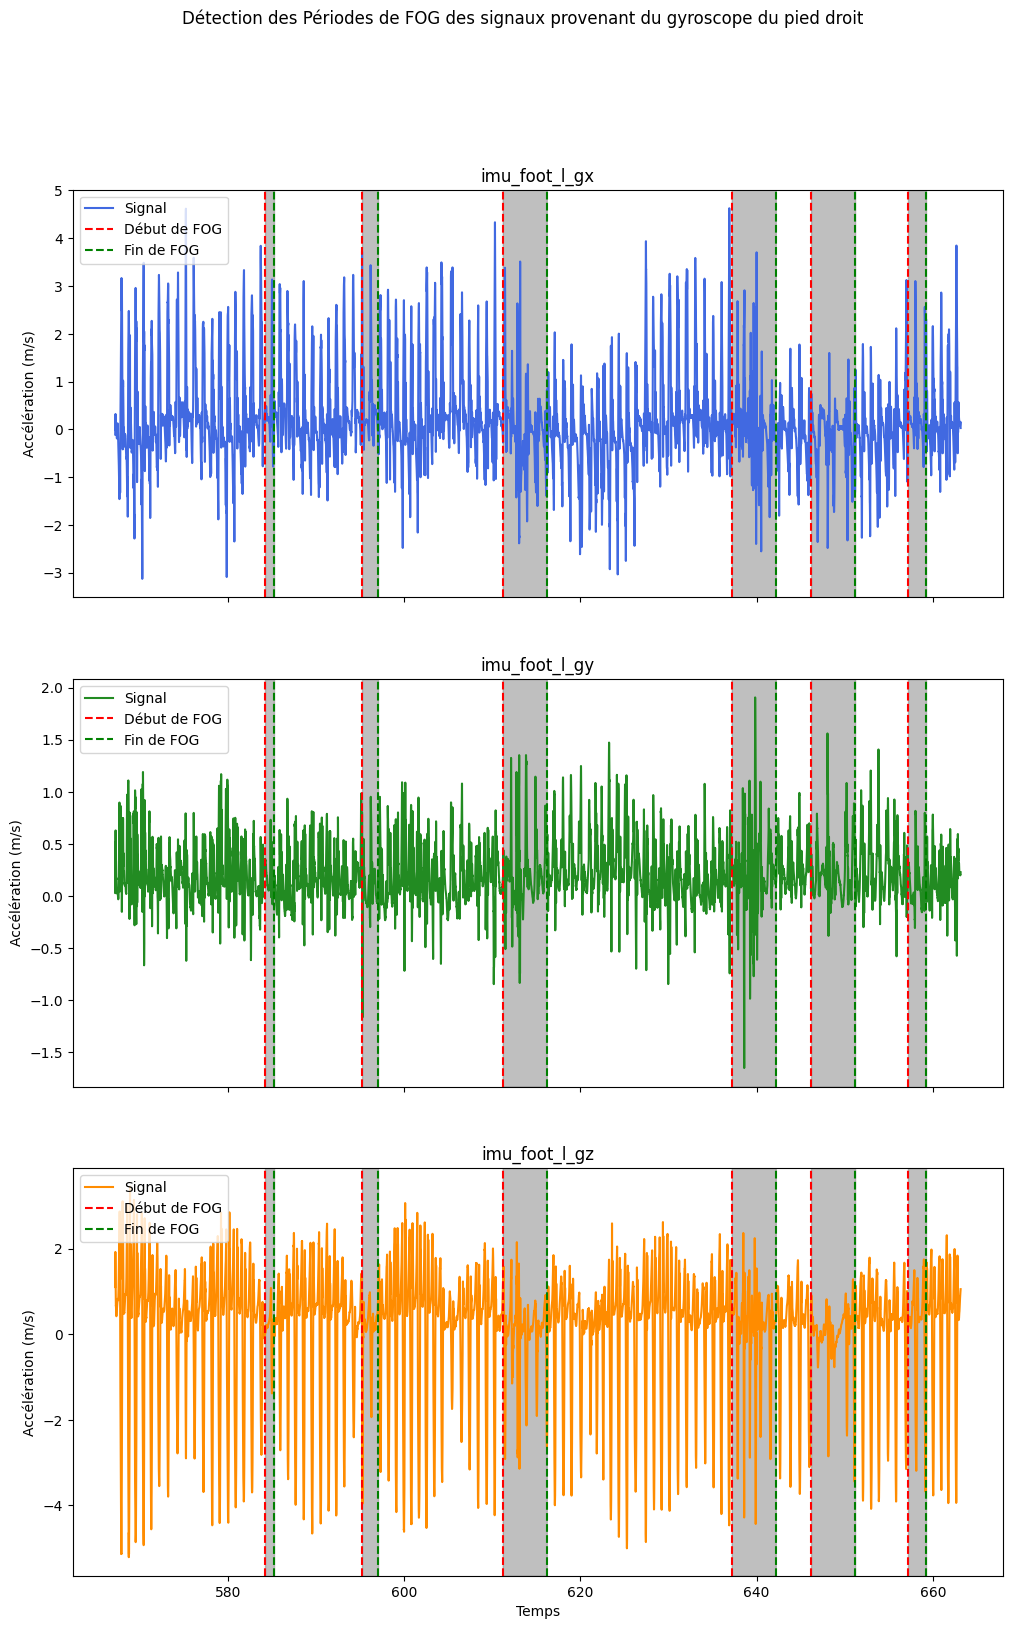

In [95]:
start_time = 0
end_time = 1000

def detect_and_plot_fog_periods(data, start_time, end_time, signals, title):
    # Trouver les indices où le label change de 0 à 1 (début du FOG)
    start_indices = np.where(np.diff(data['freeze_label']) == 1)[0] + 1

    # Trouver les indices où le label change de 1 à 0 (fin du FOG)
    end_indices = np.where(np.diff(data['freeze_label']) == -1)[0] + 1

    # Filtrer les données en fonction des temps spécifiés
    data_time_filtered = data[(data['time'] >= start_time) & (data['time'] <= end_time)]

    # Créer des sous-graphiques pour chaque axe
    fig, axs = plt.subplots(len(signals), figsize=(12, 6 * len(signals)), sharex=True)

    colors = ['royalblue', 'forestgreen', 'darkorange']

    for i, (signal, color) in enumerate(zip(signals, colors)):
        # Tracer les signaux inertiométriques sur chaque sous-graphique
        axs[i].plot(data_time_filtered['time'], data_time_filtered[signal], label="Signal", color=color)

        # Ajouter des lignes verticales pour marquer le début et la fin de chaque période de FOG
        for start, end in zip(start_indices, end_indices):
            axs[i].axvline(data_time_filtered['time'].iloc[start], color='r', linestyle='--', label='Début de FOG')
            axs[i].axvline(data_time_filtered['time'].iloc[end], color='g', linestyle='--', label='Fin de FOG')
        
        # Colorier la zone entre les lignes verticales
            axs[i].fill_between(data_time_filtered['time'].iloc[start:end + 1],
                0, 1, color='gray', alpha=0.5, transform=axs[i].get_xaxis_transform())
        
        # Paramètres des sous-graphiques
        axs[i].set(ylabel='Accélération (m/s)')
        axs[i].set_title(f'{signal}')
        
        # Créer une légende pour chaque sous-graphique
        handles, labels = axs[i].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axs[i].legend(by_label.values(), by_label.keys(), loc='upper left')

    # Paramètres communs à tous les sous-graphiques
    fig.suptitle(title)
    axs[-1].set(xlabel='Temps')

    plt.show()

# Application de la fonction

#Tracer les signaux provenant de l'accéléromètre du pied droit
signals_acc_lumbar_to_plot = ['imu_foot_r_ax', 'imu_foot_r_ay', 'imu_foot_r_az']
detect_and_plot_fog_periods(pt1_visit_24_tbc_walklr_0_trial_4, start_time, end_time, signals_acc_lumbar_to_plot, 'Détection des Périodes de FOG des signaux provenant de l\'accéléromètre du pied droit')

#Tracer les signaux provenant du gyroscope du pied droit
signals_gyr_lumbar_to_plot = ['imu_foot_r_gx', 'imu_foot_r_gy', 'imu_foot_r_gz']
detect_and_plot_fog_periods(pt1_visit_24_tbc_walklr_0_trial_4, start_time, end_time, signals_gyr_lumbar_to_plot, 'Détection des Périodes de FOG des signaux provenant du gyroscope du pied droit')

#Tracer les signaux provenant de l'accéléromètre du pied gauche
signals_acc_lumbar_to_plot = ['imu_foot_l_ax', 'imu_foot_l_ay', 'imu_foot_l_az']
detect_and_plot_fog_periods(pt1_visit_24_tbc_walklr_0_trial_4, start_time, end_time, signals_acc_lumbar_to_plot, 'Détection des Périodes de FOG des signaux provenant de l\'accéléromètre du pied droit')

#Tracer les signaux provenant du gyroscope du pied gauche
signals_gyr_lumbar_to_plot = ['imu_foot_l_gx', 'imu_foot_l_gy', 'imu_foot_l_gz']
detect_and_plot_fog_periods(pt1_visit_24_tbc_walklr_0_trial_4, start_time, end_time, signals_gyr_lumbar_to_plot, 'Détection des Périodes de FOG des signaux provenant du gyroscope du pied droit')



# III. Extraction des caractéristiques du signal

# 1. Indice de gel (Moore et al, 2008)

c:\Users\antho\Documents\MEMOIRE_M2\CODE_STAGE_M2\.venv\STAGE_M2\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


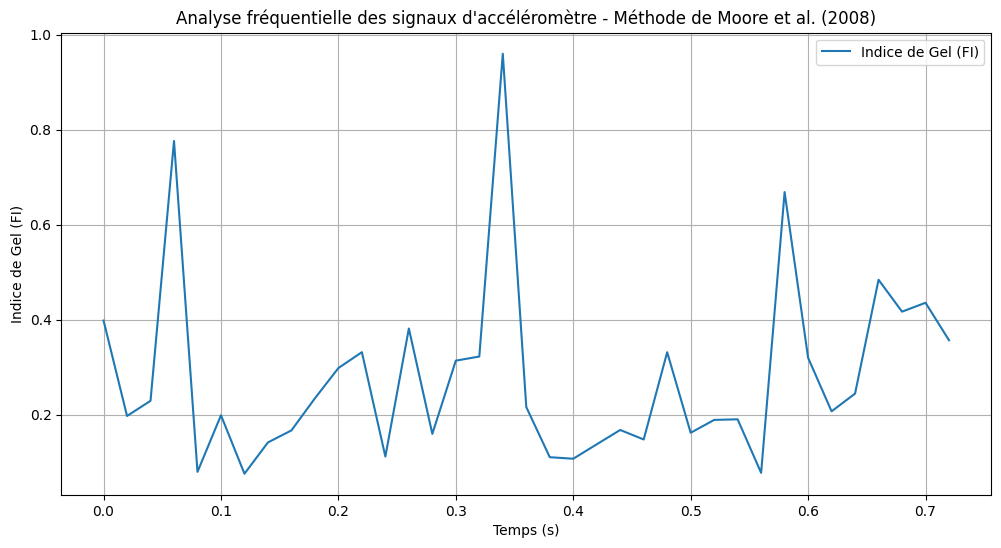

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

'''
# Fonction pour calculer l'Indice de Gel (Freezing Index)
def calculate_freezing_index(signal, fs):
    # Paramètres de la méthode de Moore et al. (2008)
    fb_band = (3, 8)  # Bande de gel de la marche en Hz
    lb_band = (0.5, 3)  # Bande de locomotion en Hz
    window_size = int(6 * fs)  # Fenêtre temporelle de 6 secondes

    # Découper le signal en segments de 6 secondes
    num_segments = len(signal) // window_size
    segments = np.array_split(signal, num_segments)

    freezing_index_values = []

    for segment in segments:
        # Calcul de la densité spectrale de puissance (PSD) avec la méthode de Welch
        f, psd = welch(segment, fs=fs, nperseg=window_size)

        # Extraire les indices de fréquence pour les bandes de gel et de locomotion
        fb_indices = np.where((f >= fb_band[0]) & (f <= fb_band[1]))[0]
        lb_indices = np.where((f >= lb_band[0]) & (f <= lb_band[1]))[0]

        # Calculer l'Indice de Gel (Freezing Index)
        freezing_index = np.sum(psd[fb_indices]) / np.sum(psd[lb_indices])
        freezing_index_values.append(freezing_index)

    return np.array(freezing_index_values)

#Application de la fonction
fs = 50  # Fréquence d'échantillonnage en Hz
time = np.arange(0, len(pt1_visit_24_tbc_walklr_0_trial_2['imu_lumbar_ax']), 1) / fs
acceleration_signal = pt1_visit_24_tbc_walklr_0_trial_2['imu_lumbar_ax']

freezing_index_values = calculate_freezing_index(acceleration_signal, fs)

# Tracer l'Indice de Gel sur le temps
plt.figure(figsize=(12, 6))
plt.plot(time[:len(freezing_index_values)], freezing_index_values, label='Indice de Gel (FI)')
plt.xlabel('Temps (s)')
plt.ylabel('Indice de Gel (FI)')
plt.title('Analyse fréquentielle des signaux d\'accéléromètre - Méthode de Moore et al. (2008)')
plt.legend()
plt.grid(True)
plt.show() '''
